In [2]:
import ast
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('D:\Projects\Python_Data_Project\data_jobs.csv')

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

<>:5: SyntaxWarning: invalid escape sequence '\P'
<>:5: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Akkju\AppData\Local\Temp\ipykernel_14636\804188518.py:5: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv('D:\Projects\Python_Data_Project\data_jobs.csv')


In [3]:
def clean_list(skills_list):
    if pd.notna(skills_list):
        return ast.literal_eval(skills_list)

df['job_skills'] = df['job_skills'].apply(clean_list)

In [4]:
df_DA_US = df[(df['job_title_short']=='Data Analyst')&(df['job_country']=='United States')].copy() #Only DA from USA

df_DA_US = df_DA_US.dropna(subset='salary_year_avg') #Drops NaN values

In [5]:
df_DA_US = df_DA_US.explode('job_skills')
df_DA_US[['salary_year_avg','job_skills']]

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel
...,...,...
784882,87500.0,sql
784882,87500.0,vba
784882,87500.0,tableau
784882,87500.0,excel


In [6]:
df_DA_US_grouped = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median'])

In [7]:
df_DA_top_pay = df_DA_US_grouped.sort_values(by='median',ascending= False).head(10)
df_DA_top_skills = df_DA_US_grouped.sort_values(by='count',ascending=False).head(10).sort_values(by='median',ascending= False).head(10)

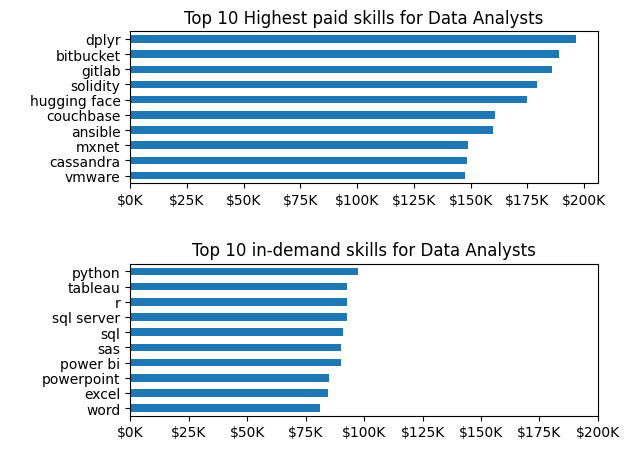

In [21]:
fig, ax = plt.subplots(2,1)

df_DA_top_pay[::-1].plot(kind='barh',y='median',ax=ax[0], legend=False)
#ax[0].invert_yaxis() #Above [::-1] method can be used as well
ax[0].set_title('Top 10 Highest paid skills for Data Analysts')
ax[0].set_ylabel(' ')
ax[0].set_xlabel(' ')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

df_DA_top_skills.plot(kind='barh',y='median',ax=ax[1], legend=False)
ax[1].invert_yaxis() #this method is also possible to invert the yaxis
#ax[1].set_xlim[ax[0].get_xlim()] #This too does the below xlim
ax[1].set_title('Top 10 in-demand skills for Data Analysts')
ax[1].set_ylabel(' ')
ax[1].set_xlabel(' ')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.xlim(0,200000)
fig.tight_layout()
